# **Dataset - 1**


In [ ]:
!pip install opendatasets pandas
import opendatasets as od


od.download("https://www.kaggle.com/datasets/hamdallak/the-iqothnccd-lung-cancer-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: meghanakoppadi
Your Kaggle Key: ··········


100%|██████████| 149M/149M [00:08<00:00, 17.4MB/s]


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [ ]:
import pandas as pd
import numpy as np
import keras
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

import sklearn.metrics as metrics
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)

In [ ]:
!pip install split-folders
import splitfolders

splitfolders.ratio(
    "/content/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset",
   output="./dataset",
   seed=7,
   ratio=(0.8, 0.2)
)

Copying files: 1097 files [00:00, 1348.09 files/s]


In [ ]:
import tensorflow as tf

# Path to the main directory
main_directory = "/content/dataset"
train_dir = '/content/dataset/train'
test_dir = "/content/dataset/val"

# Define parameters for image loading
batch_size = 4
image_size = (224, 224)
class_names = ['no', 'yes']

# Setup data inputs
import tensorflow as tf

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            label_mode = "categorical",
                                                            color_mode = 'rgb',
                                                            seed = 42,
                                                            shuffle=True,
                                                            image_size=image_size)

test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                          label_mode="categorical",
                                                          color_mode = 'rgb',
                                                          image_size=image_size,
                                                          shuffle=False)

Found 876 files belonging to 3 classes.
Found 221 files belonging to 3 classes.


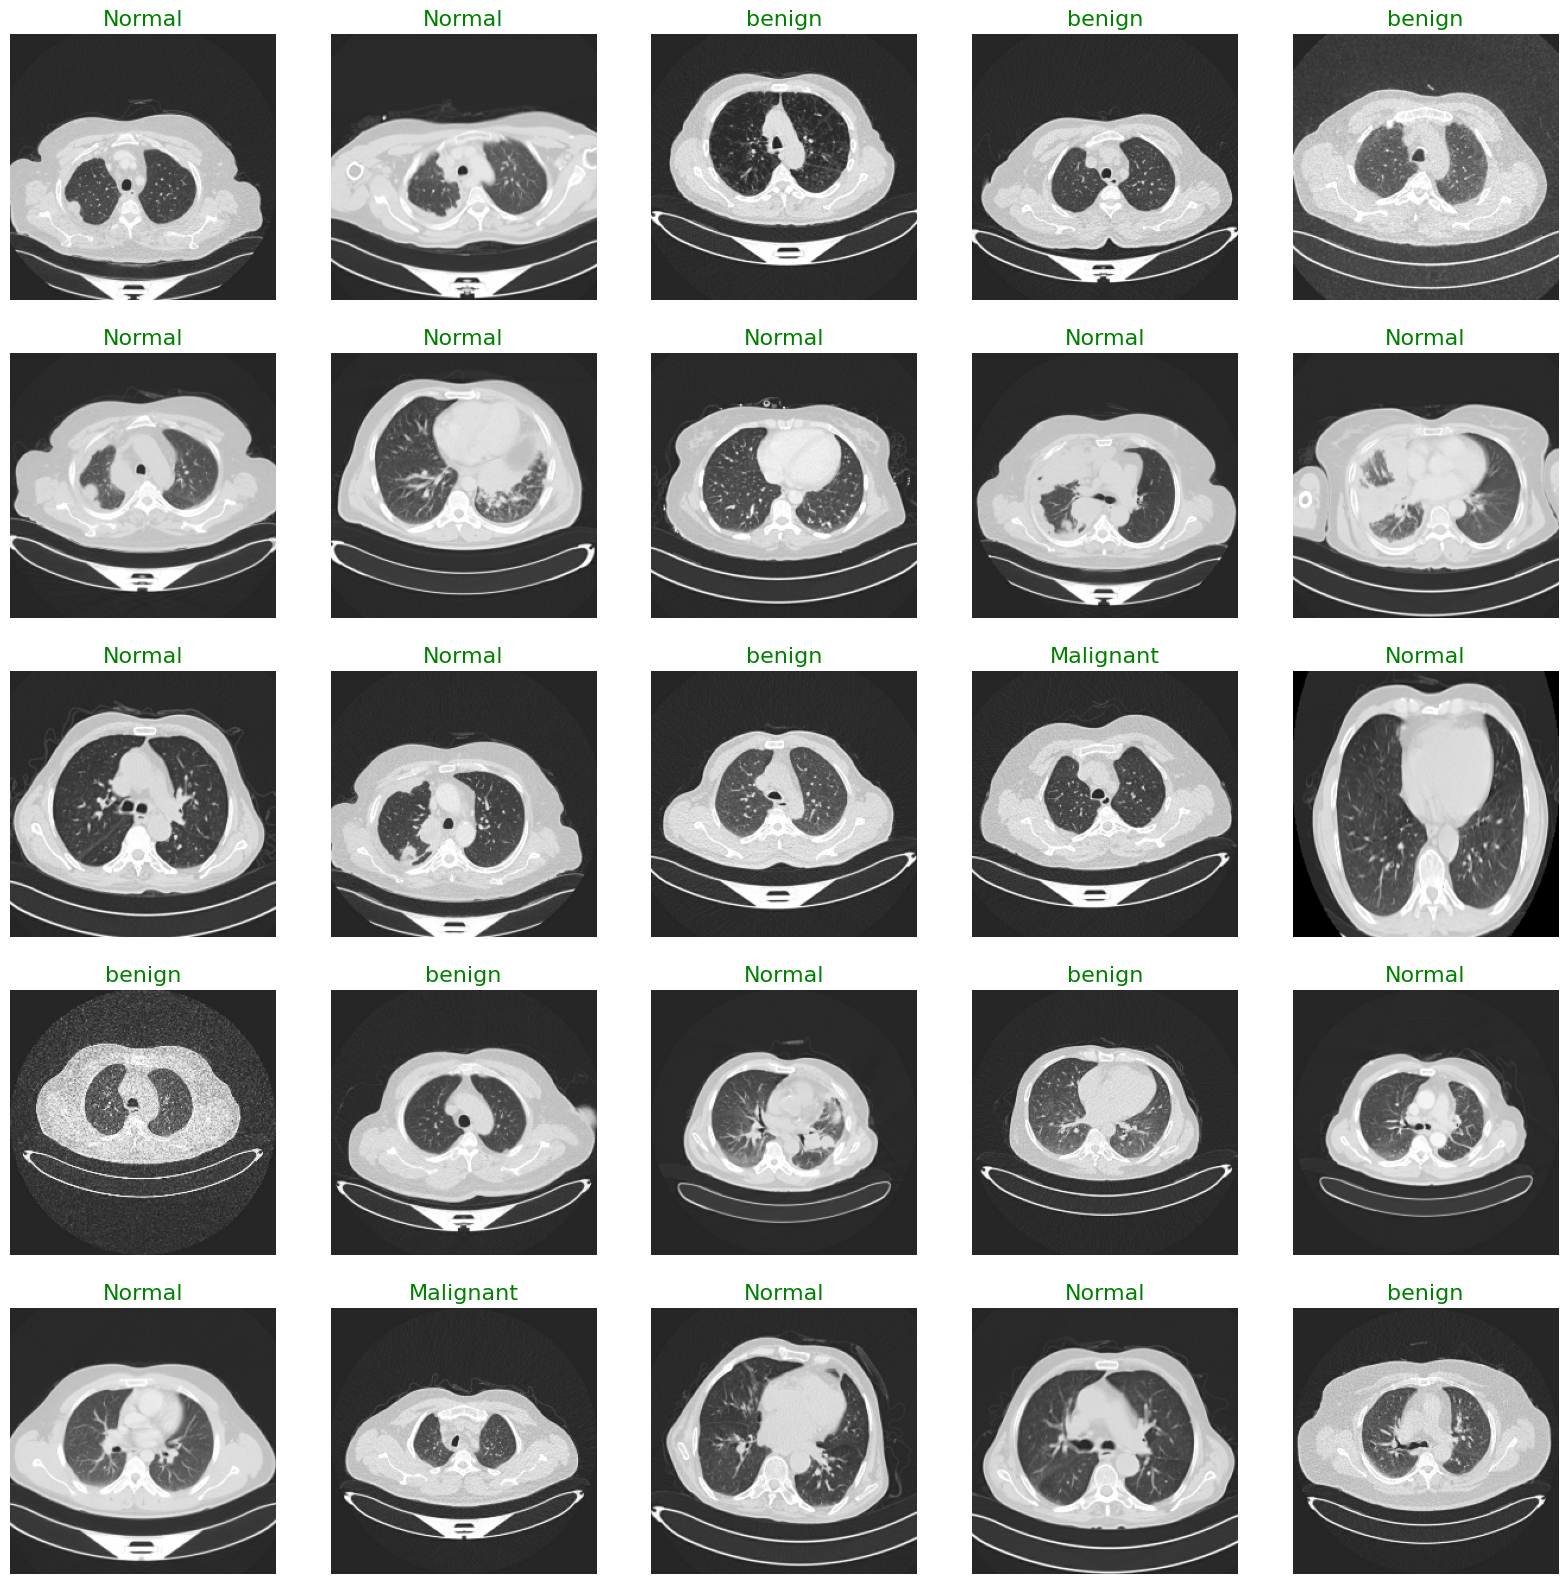

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_knee_images(image_gen):
    classes = ['Malignant', 'Normal', 'benign']

    # Convert dataset to iterator
    image_gen_iter = iter(image_gen)

    images, labels = next(image_gen_iter) # get a sample batch from the generator

    plt.figure(figsize=(20, 20))
    length = len(labels)
    if length < 25:
        r = length
    else:
        r = 25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image = images[i]  # Get the image from the batch

        # Ensure image is properly scaled between 0 and 1
        if np.max(image) > 1:
            image = image / 255.0  # If the image values are not between 0 and 1, assume it's in [0, 255] range

        plt.imshow(image)

        # Determine the label index and class name
        if labels.shape[1] > 1:  # If labels are one-hot encoded
            index = np.argmax(labels[i])
        else:  # If labels are single integer labels
            index = int(labels[i])
        class_name = classes[index]

        plt.title(class_name, color="green", fontsize=16)
        plt.axis('off')
    plt.show()

show_knee_images(iter(train_dataset))

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(8, 8), strides=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3)),

    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 73, 128)       24704     
                                                                 
 batch_normalization (Batch  (None, 73, 73, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 256)       819456    
                                                                 
 batch_normalization_1 (Bat  (None, 73, 73, 256)       1024      
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 256)       0         
 D)                                                              
                                                        

In [ ]:
history = model.fit(train_dataset, epochs=30,
                    validation_data = test_dataset, verbose=1)

Epoch 1/30
28/28 [==============================] - 26s 407ms/step - loss: 1.6555 - accuracy: 0.4795 - val_loss: 0.9964 - val_accuracy: 0.3801
Epoch 2/30
28/28 [==============================] - 6s 171ms/step - loss: 1.3008 - accuracy: 0.5559 - val_loss: 0.9611 - val_accuracy: 0.6244
Epoch 3/30
28/28 [==============================] - 5s 144ms/step - loss: 0.9852 - accuracy: 0.6450 - val_loss: 1.0212 - val_accuracy: 0.5113
Epoch 4/30
28/28 [==============================] - 5s 156ms/step - loss: 0.7608 - accuracy: 0.7112 - val_loss: 0.9832 - val_accuracy: 0.5113
Epoch 5/30
28/28 [==============================] - 5s 161ms/step - loss: 0.6303 - accuracy: 0.7660 - val_loss: 0.9323 - val_accuracy: 0.5068
Epoch 6/30
28/28 [==============================] - 5s 152ms/step - loss: 0.5150 - accuracy: 0.8025 - val_loss: 0.8936 - val_accuracy: 0.5158
Epoch 7/30
28/28 [==============================] - 5s 150ms/step - loss: 0.4570 - accuracy: 0.8162 - val_loss: 0.6576 - val_accuracy: 0.7511
Epoch

In [ ]:
model.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 1s 72ms/step - loss: 0.0353 - accuracy: 0.9910


[0.03527771309018135, 0.9909502267837524]

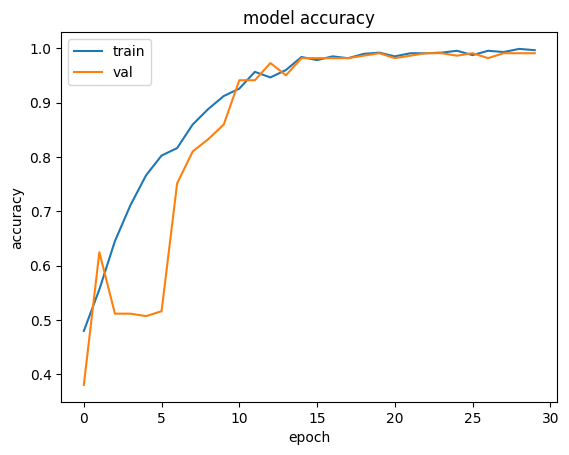

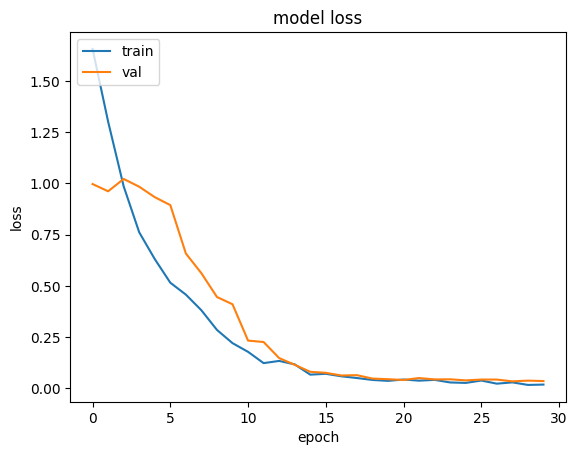

In [ ]:
# Plot Accuracy curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot Loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

7/7 [==============================] - 1s 84ms/step
Confusion Matrix:
[[ 22   0   2]
 [  0 113   0]
 [  0   0  84]]
Accuracy: 0.9910


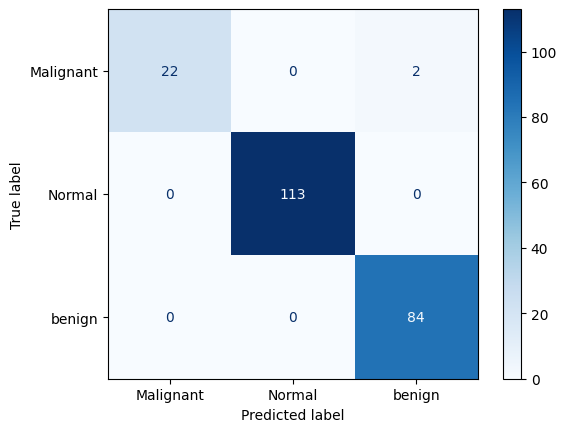

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score

# Extract true labels from the test dataset
y_labels = []
for _, labels in test_dataset.unbatch():
    # Assuming labels are one-hot encoded, get the index of the maximum value
    label_index = tf.argmax(labels).numpy()
    y_labels.append(label_index)

# Convert to numpy array
y_labels = np.array(y_labels)

# Assuming model_pred_probs contains the predicted probabilities
model_pred_probs = model.predict(test_dataset)
y_pred = np.round(model_pred_probs).argmax(axis=1)

conf_matrix = confusion_matrix(y_labels, y_pred)
acc = accuracy_score(y_labels, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {acc:.4f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Malignant', 'Normal', 'benign'])
disp.plot(cmap='Blues', values_format='d')

plt.show()

7/7 [==============================] - 1s 103ms/step
Accuracy: 0.9909502262443439
Precision: 0.9922480620155039
Recall: 0.9722222222222222
F1_score: 0.9815856777493606


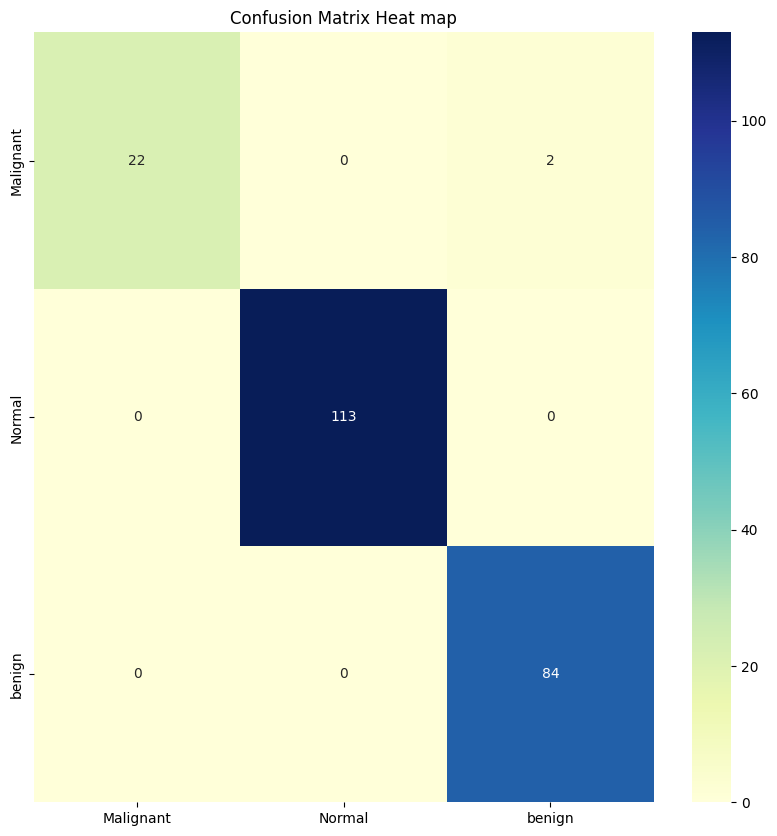

In [ ]:
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support

predictions = model.predict(test_dataset)
labels = ['Malignant', 'Normal', 'benign']

def evaluate(actual, predictions):
  pre = []
  for i in predictions:
    pre.append(np.argmax(i))

  accuracy = (pre == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')

  precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1_score: {f1_score}')

  fig, ax = plt.subplots(figsize=(10,10))
  conf_mat = confusion_matrix(actual, pre)
  sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu",
              xticklabels = labels, yticklabels = labels).set_title('Confusion Matrix Heat map')
  plt.show()

evaluate(y_labels, predictions)

# **Dataset - 2**

In [ ]:
!pip install opendatasets pandas
import opendatasets as od


od.download("https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images?select=Data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: meghanakoppadi
Your Kaggle Key: ··········


100%|██████████| 119M/119M [00:00<00:00, 159MB/s]


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import tensorflow.keras
from tensorflow.keras import layers
# from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.preprocessing import image
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.applications import EfficientNetV2B3
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.efficientnet import EfficientNetB3

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# File Directory for both the train and test
train_path = "/content/chest-ctscan-images/Data/train"
val_path = "/content/chest-ctscan-images/Data/valid"
test_path = "/content/chest-ctscan-images/Data/test"

In [ ]:
# Define function to count number of images per class using a dictionary
def GetDatasetSize(path):
    num_of_image = {}
    for folder in os.listdir(path):
        # count files in the folder
        num_of_image[folder] = len(os.listdir(os.path.join(path, folder)));
    return num_of_image;

# Get the number of images per class in each set (train, validation and test)
train_set = GetDatasetSize(train_path)
val_set = GetDatasetSize(val_path)
test_set = GetDatasetSize(test_path)
print(train_set,"\n\n",val_set,"\n\n",test_set)

{'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 155, 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 195, 'normal': 148, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 115} 

 {'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 15, 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 23, 'normal': 13, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 21} 

 {'large.cell.carcinoma': 51, 'adenocarcinoma': 120, 'squamous.cell.carcinoma': 90, 'normal': 54}


In [ ]:
import os

# Define the current and new folder names
current_folder_name1 = '/content/chest-ctscan-images/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
new_folder_name1 = '/content/chest-ctscan-images/Data/train/adenocarcinoma'

current_folder_name2 = '/content/chest-ctscan-images/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
new_folder_name2 = '/content/chest-ctscan-images/Data/valid/adenocarcinoma'

current_folder_name3 = '/content/chest-ctscan-images/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'
new_folder_name3 = '/content/chest-ctscan-images/Data/train/large.cell.carcinoma'

current_folder_name4 = '/content/chest-ctscan-images/Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'
new_folder_name4 = '/content/chest-ctscan-images/Data/valid/large.cell.carcinoma'

current_folder_name5 = '/content/chest-ctscan-images/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'
new_folder_name5 = '/content/chest-ctscan-images/Data/train/squamous.cell.carcinoma'

current_folder_name6 = '/content/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'
new_folder_name6 = '/content/chest-ctscan-images/Data/valid/squamous.cell.carcinoma'

# Rename the folder
os.rename(current_folder_name1, new_folder_name1)
os.rename(current_folder_name2, new_folder_name2)
os.rename(current_folder_name3, new_folder_name3)
os.rename(current_folder_name4, new_folder_name4)
os.rename(current_folder_name5, new_folder_name5)
os.rename(current_folder_name6, new_folder_name6)

In [ ]:
import os
import shutil
from PIL import Image

def merge_images_to_dataset(source_directory, destination_directory):
    # Create the destination directory if it doesn't exist
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    for root, dirs, files in os.walk(source_directory):
        for file in files:
            # Check if the file is an image
            try:
                image_path = os.path.join(root, file)
                image = Image.open(image_path)
                image.close()  # Close the image to release the resources

                # Determine the category (e.g., 'adenocarcinoma', 'normal', etc.)
                category = os.path.basename(os.path.dirname(image_path))

                # Create the category folder in the destination directory if it doesn't exist
                category_folder = os.path.join(destination_directory, category)
                if not os.path.exists(category_folder):
                    os.makedirs(category_folder)

                # Copy the image file to the corresponding category folder in the destination directory
                shutil.copy(image_path, os.path.join(category_folder, file))

            except (IOError, OSError):
                # Not an image file
                pass

# Source directory containing the subdirectories with images
source_directory = "/content/chest-ctscan-images/Data"

# Destination directory to merge images into
destination_directory = "/content/dataset"

merge_images_to_dataset(source_directory, destination_directory)
print("Images have been merged into the dataset directory.")


Images have been merged into the dataset directory.


In [ ]:
import os
from PIL import Image

def count_images_in_directory(directory):
    image_count = 0

    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check if the file is an image
            try:
                image = Image.open(os.path.join(root, file))
                image.close()  # Close the image to release the resources
                image_count += 1
            except (IOError, OSError):
                # Not an image file
                pass

        # Print the count for the current directory
        print(f"Number of images in {root}: {image_count}")
        image_count = 0  # Reset count for the next directory

# Directory to start scanning from
starting_directory = "/content/dataset"

count_images_in_directory(starting_directory)

Number of images in /content/dataset: 0
Number of images in /content/dataset/large.cell.carcinoma: 163
Number of images in /content/dataset/adenocarcinoma: 326
Number of images in /content/dataset/val: 0
Number of images in /content/dataset/val/Bengin cases: 24
Number of images in /content/dataset/val/Malignant cases: 113
Number of images in /content/dataset/val/Normal cases: 84
Number of images in /content/dataset/train: 0
Number of images in /content/dataset/train/Bengin cases: 96
Number of images in /content/dataset/train/Malignant cases: 448
Number of images in /content/dataset/train/Normal cases: 332
Number of images in /content/dataset/squamous.cell.carcinoma: 252
Number of images in /content/dataset/normal: 159


In [ ]:
# import shutil; shutil.rmtree('/content/chest-ctscan-images')

In [ ]:
!pip install split-folders

import splitfolders

splitfolders.ratio(
    "./dataset",
   output="./data",
   seed = 7,
   ratio=(0.8, 0.2)
)

import shutil; shutil.rmtree('/content/dataset')

Copying files: 900 files [00:00, 4483.41 files/s]


In [ ]:
import tensorflow as tf

# Path to the main directory
main_directory = "/content/data"
train_dir = '/content/data/train'
test_dir = "/content/data/val"

# Define parameters for image loading
batch_size = 4
image_size = (224, 224)
class_labels = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

# Setup data inputs
import tensorflow as tf

train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            label_mode = "categorical",
                                                            color_mode = 'rgb',
                                                            seed = 42,
                                                            shuffle=True,
                                                            image_size=image_size)

test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                          label_mode="categorical",
                                                          color_mode = 'rgb',
                                                          image_size=image_size,
                                                          shuffle=False)

Found 718 files belonging to 6 classes.
Found 182 files belonging to 6 classes.


### Confusion Matrix & Training curves Plot Functions

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(test_data, model, model_name):
    y_labels = []
    for _, labels in test_data.unbatch():
        label_index = tf.argmax(labels).numpy()
        y_labels.append(label_index)

    y_labels = np.array(y_labels)

    model_pred_probs = model.predict(test_data)
    y_pred = np.round(model_pred_probs).argmax(axis=1)

    conf_matrix = confusion_matrix(y_labels, y_pred)
    acc = accuracy_score(y_labels, y_pred)

    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Accuracy: {acc:.4f}")

    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma'])
    disp.plot(cmap='Blues', values_format='d')
    plt.xticks(rotation=40, horizontalalignment='right')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Example usage:
# plot_confusion_matrix(test_data, model, 'EfficientNetV2B3', ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma'])

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(model_name, history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(accuracy))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(epochs, accuracy, 'b', label='Training accuracy')
    ax1.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    ax1.set_title(f'{model_name} - Training and validation accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    ax2.plot(epochs, loss, 'b', label='Training loss')
    ax2.plot(epochs, val_loss, 'r', label='Validation loss')
    ax2.set_title(f'{model_name} - Training and validation loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend()

    fig.suptitle(f'{model_name} - Training and validation metrics', fontsize=16)
    plt.show()

# Example usage:
# plot_training_history('EfficientNetV2B3', effv2b3_model_history)


### Inception-V3

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 global_average_pooling_lay  (None, 2048)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 dense_18 (Dense)            (None, 256)               524544    
                                                                 
 dense_19 (Dense)            (None, 32)                8224      
                                                           

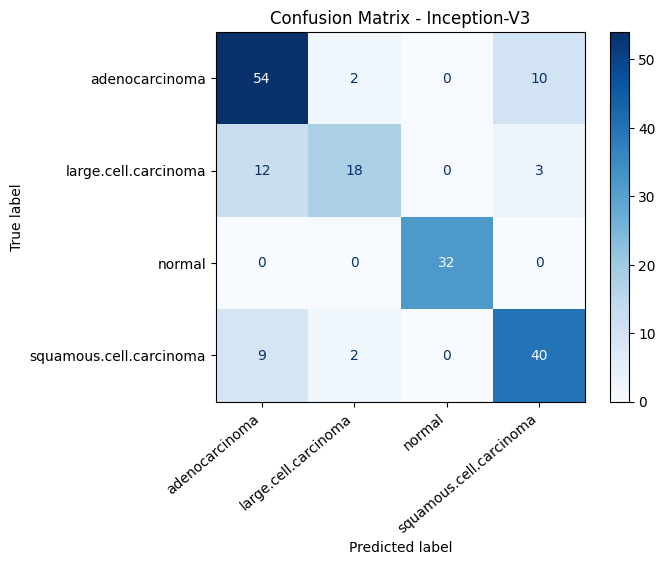

In [ ]:
from keras.applications import InceptionV3

# create the base pre-trained model
base_model = InceptionV3(include_top=False)
base_model.trainable = False
inputs = layers.Input(shape= (224, 224, 3), name = "input_layer")
x = base_model(inputs)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(8, activation='relu')(x)
outputs = tf.keras.layers.Dense(6, activation="softmax", name="output_layer")(x)
inception_model = keras.Model(inputs, outputs)

inception_model.summary()

inception_model.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-4),
                metrics = ['accuracy'])

inception_model_history = inception_model.fit(train_data,
                            steps_per_epoch = len(train_data),
                            epochs = 30,
                            validation_data = test_data,
                            validation_steps = len(test_data))

plot_confusion_matrix(test_data, inception_model, "Inception-V3")

In [ ]:
inception_training_accuracy = inception_model_history.history['accuracy'][-1]; print(f"Inception Train Accuracy: {inception_training_accuracy:.4f}")
inception_validation_accuracy = inception_model_history.history['val_accuracy'][-1]; print(f"Inception Test Accuracy: {inception_validation_accuracy:.4f}")

Inception Train Accuracy: 0.9624
Inception Test Accuracy: 0.7967


### VGG-16

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling_lay  (None, 512)               0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 dense_24 (Dense)            (None, 256)               131328    
                                                                 
 dense_25 (Dense)            (None, 32)                8224      
                                                                 
 dense_26 (Dense)            (None, 8)                 264 

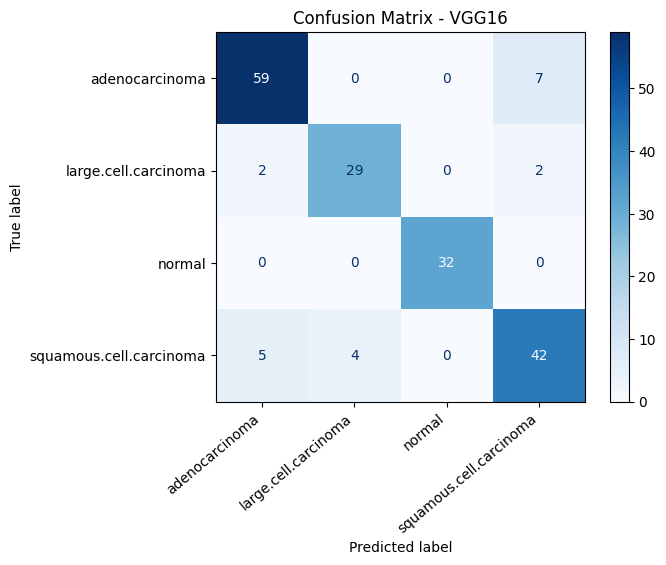

In [ ]:
from keras.applications import VGG16

# create the base pre-trained model
base_model = VGG16(include_top=False)
base_model.trainable = False
inputs = layers.Input(shape= (224, 224, 3), name="input_layer")
x = base_model(inputs)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(8, activation='relu')(x)
outputs = tf.keras.layers.Dense(6, activation="softmax", name="output_layer")(x)
vgg16_model = keras.Model(inputs, outputs)

vgg16_model.summary()

vgg16_model.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-4),
                metrics = ['accuracy'])
vgg16_model_history = vgg16_model.fit(train_data,
                            steps_per_epoch = len(train_data),
                            epochs = 30,
                            validation_data = test_data,
                            validation_steps = len(test_data))

plot_confusion_matrix(test_data, vgg16_model, "VGG16")

In [ ]:
vgg16_training_accuracy = vgg16_model_history.history['accuracy'][-1]; print(f"vgg16 Train Accuracy: {vgg16_training_accuracy:.4f}")
vgg16_validation_accuracy = vgg16_model_history.history['val_accuracy'][-1]; print(f"vgg16 Test Accuracy: {vgg16_validation_accuracy:.4f}")

vgg16 Train Accuracy: 1.0000
vgg16 Test Accuracy: 0.8956


6/6 [==============================] - 1s 143ms/step
Confusion Matrix:
[[59  0  0  7]
 [ 2 29  0  2]
 [ 0  0 32  0]
 [ 5  4  0 42]]
Accuracy: 0.8901


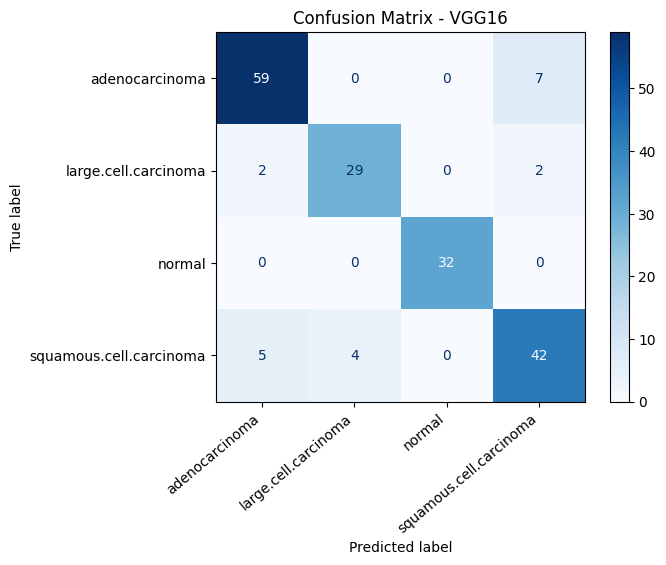

In [ ]:
plot_confusion_matrix(test_data, vgg16_model, "VGG16")

### EffecientNet-V2-B3

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b3 (Functio  (None, None, None, 1536   12930622  
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1536)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 dense_27 (Dense)            (None, 256)               393472    
                                                                 
 dense_28 (Dense)            (None, 32)                8224      
                                                           

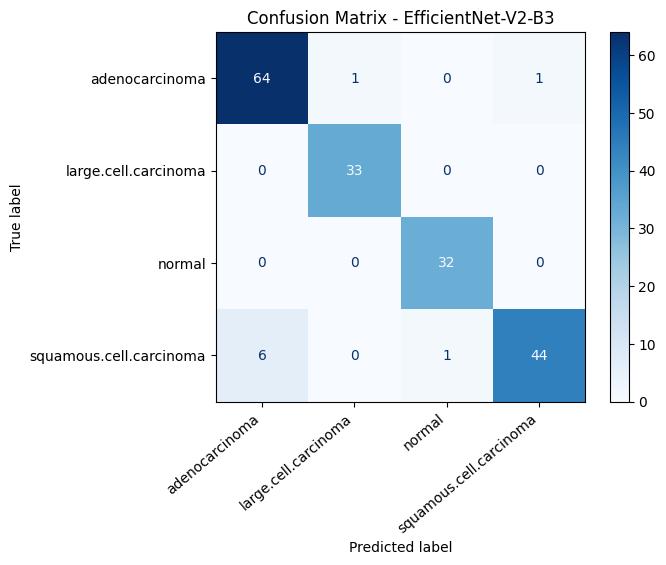

In [ ]:
from keras.applications import EfficientNetV2B3

# create the base pre-trained model
base_model = EfficientNetV2B3(include_top=False)
base_model.trainable = False
inputs = layers.Input(shape= (224, 224, 3), name="input_layer")
x = base_model(inputs)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
# x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(8, activation='relu')(x)
outputs = tf.keras.layers.Dense(6, activation="softmax", name="output_layer")(x)
effv2b3_model = keras.Model(inputs, outputs)

effv2b3_model.summary()

effv2b3_model.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-4),
                metrics = ['accuracy'])
effv2b3_model_history = effv2b3_model.fit(train_data,
                            steps_per_epoch = len(train_data),
                            epochs = 30,
                            validation_data = test_data,
                            validation_steps = len(test_data))


plot_confusion_matrix(test_data, effv2b3_model, "EfficientNet-V2-B3")

In [ ]:
effv2b3_training_accuracy = effv2b3_model_history.history['accuracy'][-1]; print(f"effv2b3 Train Accuracy: {effv2b3_training_accuracy:.4f}")
effv2b3_validation_accuracy = effv2b3_model_history.history['val_accuracy'][-1]; print(f"effv2b3 Test Accuracy: {effv2b3_validation_accuracy:.4f}")

effv2b3 Train Accuracy: 0.9638
effv2b3 Test Accuracy: 0.9451


### Testing & Demo

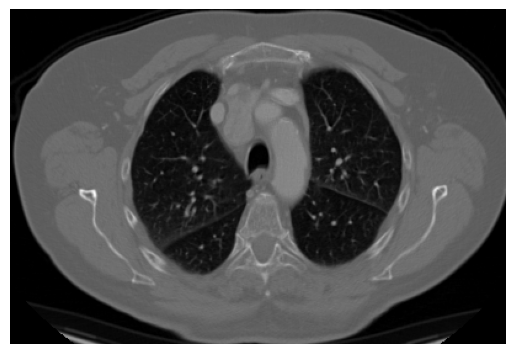

1/1 [==============================] - 2s 2s/step
prediction Output =  0
Predicted as:  adenocarcinoma


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

diseases_labels = ['adenocarcinoma', 'large cell carcinoma', 'normal', 'squamous cell carcinoma']
# Path to the image file
image_path = '/content/data/train/adenocarcinoma/000036 (6).png'

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)  # Assuming the image is grayscale
plt.axis('off')  # Turn off axis labels
plt.show()

def classify_image(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    preds = effv2b3_model.predict(x)
    pred = np.argmax(preds)
    print("prediction Output = ",pred)
    print("Predicted as: ", diseases_labels[pred])

# Example usage
classify_image(image_path)


## **Model Comparision**

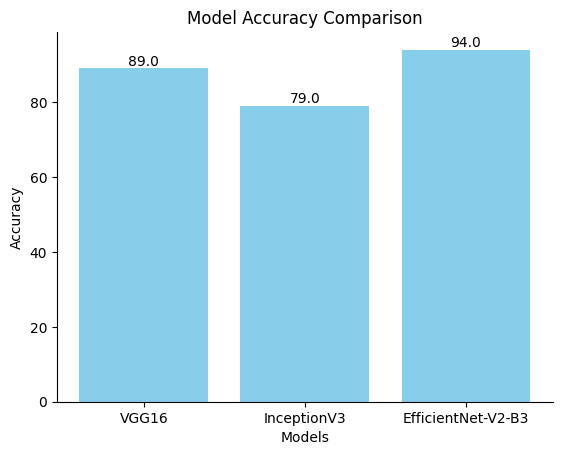

In [ ]:
algos = ['VGG16', 'InceptionV3', 'EfficientNet-V2-B3']
accuracy = [vgg16_validation_accuracy, inception_validation_accuracy, effv2b3_validation_accuracy]
accuracy = np.floor([i * 100 for i in accuracy])


fig, ax = plt.subplots()
bars = ax.bar(algos, accuracy, color='skyblue')

# Add data values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


plt.show()


--2024-04-21 05:40:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-04-21 05:40:32 (117 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



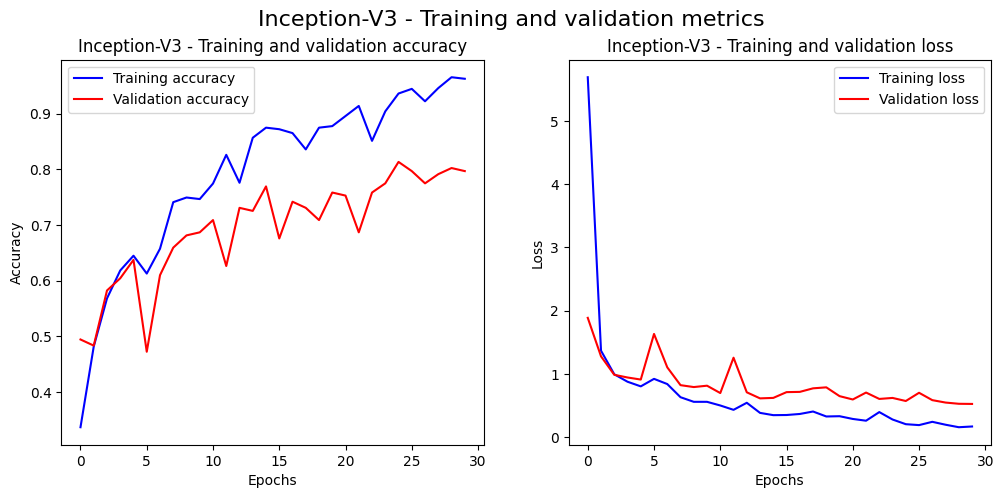

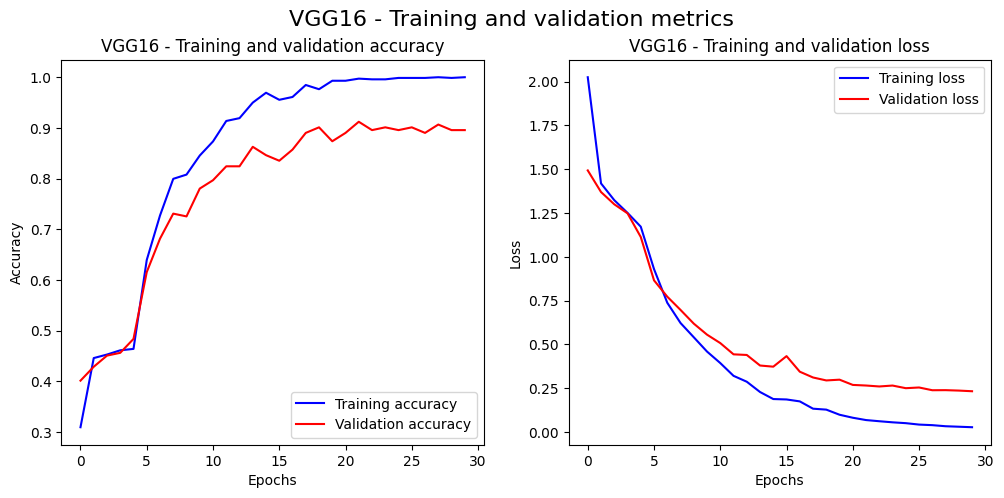

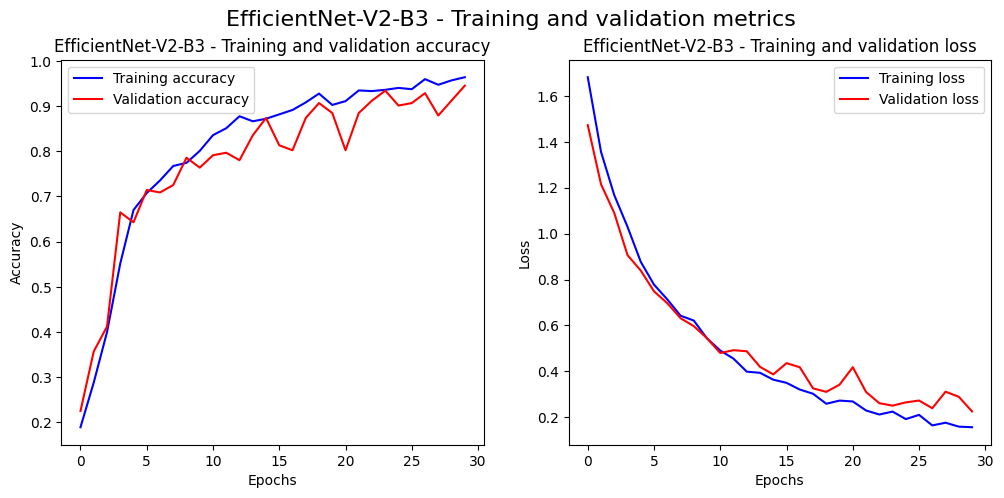

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import plot_loss_curves, compare_historys, walk_through_dir, pred_and_plot

plot_training_history("Inception-V3", inception_model_history)
plot_training_history("VGG16", vgg16_model_history)
plot_training_history("EfficientNet-V2-B3", effv2b3_model_history)

### Questions

 - how will it find from images - explain processes
 - CNN internal working
 - size of image in image
 -